In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Linear Dataset

In [4]:
df1 = pd.read_csv('linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [5]:
x_linear = df1[['x']]
y_linear = df1[['y']]

## Import Non-Linear Dataset

In [6]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [7]:
x_nonlinear = df2[['x']]
y_nonlinear = df2[['y']]

## Visual Representation

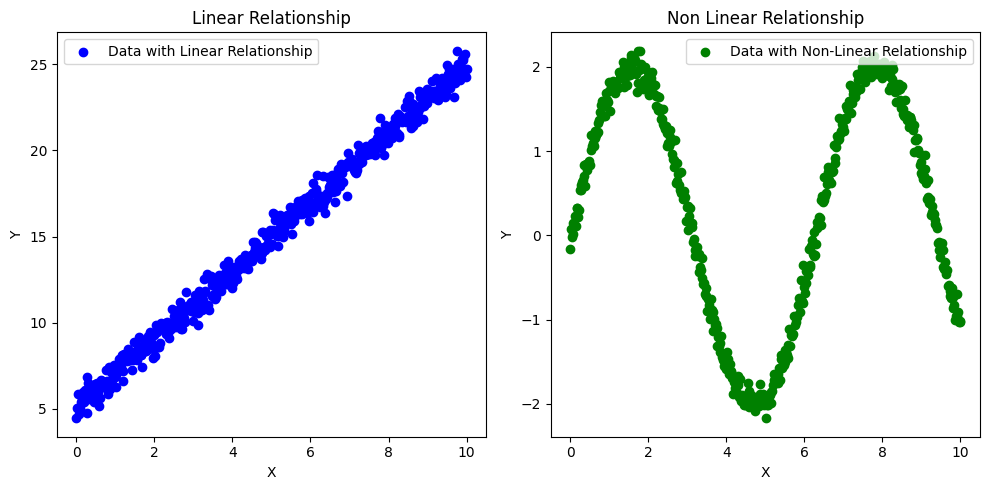

In [15]:
# linear 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

# non-linear 
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

## Show Correlation

In [19]:
# linear
df1.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [20]:
# non-linear
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


## Linear Relationship

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg1 = LinearRegression()

In [23]:
# train the model
reg1.fit(x_linear, y_linear)

LinearRegression()

In [24]:
reg1.score(x_linear, y_linear)

0.9928923730526016

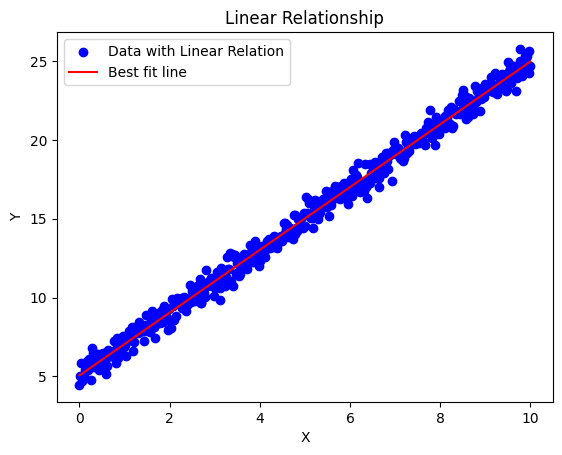

In [27]:
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relation')
plt.plot(x_linear, reg1.predict(x_linear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

## Non-Linear

In [28]:
reg2 = LinearRegression()

In [29]:
reg2.fit(x_nonlinear, y_nonlinear)

LinearRegression()

In [30]:
reg2.score(x_nonlinear, y_nonlinear)

0.004321199719043656

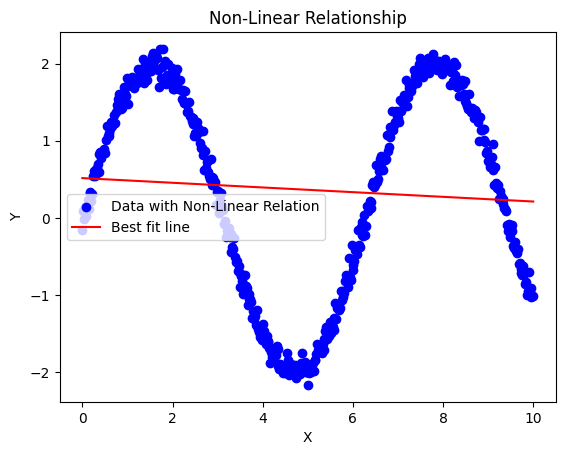

In [31]:
plt.scatter(x_nonlinear, y_nonlinear, color='blue', label='Data with Non-Linear Relation')
plt.plot(x_linear, reg2.predict(x_nonlinear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relationship')
plt.legend()

## Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x_nonlinear)

In [42]:
x_poly.shape

(500, 7)

In [43]:
reg_poly = LinearRegression()

In [44]:
# trin the model
reg_poly.fit(x_poly, y_nonlinear)

LinearRegression()

In [45]:
reg_poly.score(x_poly, y_nonlinear)

0.9930624844497349

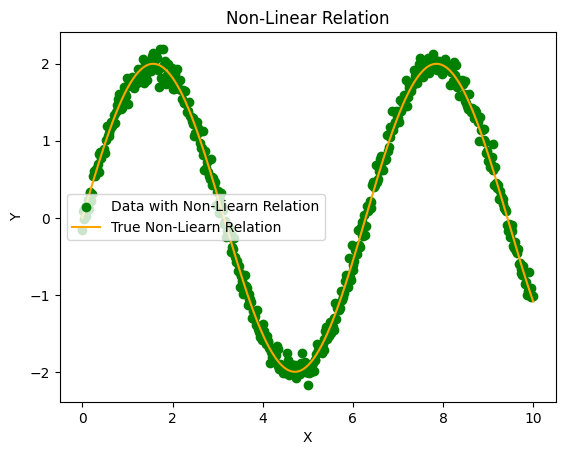

In [50]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-Liearn Relation')

plt.plot(x_nonlinear, 2 * np.sin(x_nonlinear), color='orange', label='True Non-Liearn Relation')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Relation')
plt.legend()

# Check Overfit, Underfit, Bestfit

## Seperate Train Test Data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_nonlinear, test_size=0.30, random_state=1)

In [53]:
reg = LinearRegression()

In [54]:
reg.fit(x_train, y_train)

LinearRegression()

## Testing Score

In [55]:
reg.score(x_test, y_test)

0.9905664282633516

## Training Score

In [56]:
reg.score(x_train, y_train)

0.9939293669434802